# Funktioiden piirtäminen ja differentiaaliyhtälöiden numeerinen ratkaiseminen pythonilla

Yritän kertoa lyhyesti, mitä ovat funktiot ja differentiaaliyhtälöt ja miten niitä voi käsitellä pythonilla. Ennen tai jälkeen tähän perehtymisen kannattaa lukea jostain matikan kirjasta matemaattisen asiallinen esittely funktioista.

Selitän ohjelmakoodia melko seikkaperäisesti, mutta tuskin niin perusteellisesti, että tätä juttua voisi kunnolla ymmärtää, ellei tunne ohjelmoinnin perusteita. Oudoille python-komennoille löytyy selitys googlaamalla, joten kaikkea minulta selittämättä jäänyttä ei tarvitse tietää ennakolta. Googlailu on muutenkin olennainen osa ohjelmointia, joten on hyvä harjoitella, millaisilla hauilla parhaiten löytää tarvitsemansa.

On todella vaikeaa ja suuritöistä selittää kirjoittamalla kaikki oleellinen. On paljon helpompaa auttaa pientä ryhmää ratkomaan ongelmia ja selittää asiat juuri heidän tarvitsemallaan tavalla. Isossa luokassa taas ei tiedä, kuka tarvitsee minkäkinlaista selitystä. Oppijan kannalta tylsintä lienee kuunnella opettajan pitkiä yksinpuheluita, joten ehkä sittenkin parasta on kirjoittaa niin perusteelliset ohjeet, että opiskelijat kykenevät työskentelemään osittain omin päin jolloin opettajalle jää aikaa pienten ryhmien opastamiseen. Samalla opettaja oppii, miten parantaa ohjeitaan.

[Tämä tiedosto jupyter-notebook -muodossa](Funktio+Differentiaaliyhtalo.ipynb) (Ei lataudu selaimeen, mutta voit ladata sen koneellesi)

[Tämä tiedosto python-koodina](Funktio+Differentiaaliyhtalo.py) Voit ladata koneellesi ja suorittaa, jos sinulla on python installoituna.


# Valmiit aliohjelmakirjastot

Ohjelman aluksi kerron, mitä valmiita aliohjelmakirjastoja haluan käyttää. 

- `matplotlib`-kirjastossa on kuvaajien piirtelyyn sopivia funktioita.
- `import matplotlib.pyplot  as plt`-komennon jälkeen voin kutsua esimerkiksi `pylab`-kirjaston funktiota `plot` seuraavasti: `plt.plot(x,y)` 
- `%matplotlib inline` komento kertoo, että haluan kuvaajat näkyviin tähän samaan dokumenttiin. 
- `math`-kirjastosta voin kutsua luettelemiani funktiota suoraan; esimerkiksi: `y = sin(pi)`
- `numpy`-kirjastossa on erilaisia numeerisen laskennan funktiota ja `sympy`-kirjastossa symbolisen laskennan funktiota.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import sin, cos, sqrt, pi, exp
import numpy as np
import sympy as sp
from IPython.display import display

sp.init_printing()

# Funktio

funktio $f(x) = x*(x-1)*(x+1)$ pythonilla koodattuna

In [2]:
def f(x):
    return x * (x - 1) * (x + 1)


# kokeillaan funktiota
# print-käskylle voi antaa monta argumenttia pilkulla erotettuna, 
# alla merkkijono ja funktion f antama luku
print("f(1) = ", f(1))

print("\n for-silmukka")  # \n tarkoittaa rivinvaihtoa

for i in range(-4, 5):  # Huom: range(-4,5) menee -4:stä 4:ään
    x = 0.5 * i
    print(i, ": f(", x, ") = ", f(x))

f(1) =  0

 for-silmukka
-4 : f( -2.0 ) =  -6.0
-3 : f( -1.5 ) =  -1.875
-2 : f( -1.0 ) =  0.0
-1 : f( -0.5 ) =  0.375
0 : f( 0.0 ) =  -0.0
1 : f( 0.5 ) =  -0.375
2 : f( 1.0 ) =  0.0
3 : f( 1.5 ) =  1.875
4 : f( 2.0 ) =  6.0


Funktioista saa paremman käsityksen piirtelemällä niitä. Funktioiden piirtämiseen käytän pylab-kirjastoa. Esimerkiksi plot-funktio ottaa argumenteiksi listan x- ja y-koordinaatteja.

xx =  [-1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

yy =  [-1.875, -1.3439999999999996, -0.897, -0.5279999999999999, -0.23100000000000026, 0.0, 0.17099999999999996, 0.288, 0.35700000000000004, 0.384, 0.375, 0.33599999999999997, 0.27299999999999996, 0.192, 0.09900000000000002, -0.0, -0.09900000000000002, -0.19200000000000003, -0.273, -0.33599999999999997, -0.375, -0.384, -0.35700000000000004, -0.288, -0.17099999999999996, 0.0, 0.23100000000000023, 0.5279999999999999, 0.8970000000000001, 1.3439999999999996, 1.875]

Tulostetaan y neljän desimaalin tarkkuudella
yy =  ['-1.875', '-1.344', '-0.897', '-0.528', '-0.231', '0', '0.171', '0.288', '0.357', '0.384', '0.375', '0.336', '0.273', '0.192', '0.099', '-0', '-0.099', '-0.192', '-0.273', '-0.336', '-0.375', '-0.384', '-0.357', '-0.288', '-0.171', '0', '0.231', '0.528', '0.897', '1.344', '1.875']


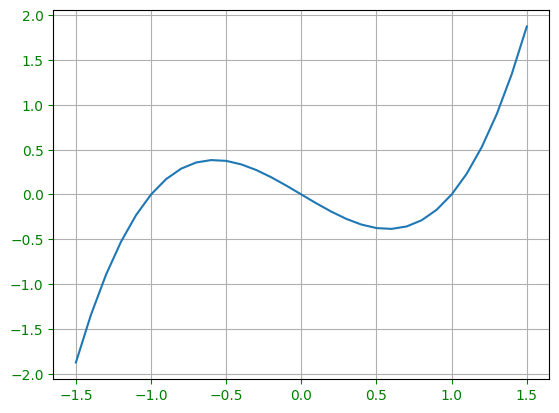

In [3]:
xx = [i / 10.0 for i in range(-15, 16)]
print("xx = ", xx)
# f(x):n arvot kullakin x:n arvolla, joka kuuluu listaan xx
yy = [f(x) for x in xx]
print()
print("yy = ", yy)
print("\nTulostetaan y neljän desimaalin tarkkuudella")
# Tuntuu, että tähän olisi siistimpikin tapa, mutta en nyt keksi
yys = ["{0:.4g}".format(y) for y in yy]
print("yy = ", yys)
plt.plot(xx, yy)
plt.grid(True)
plt.tick_params(axis='both', colors='green')
plt.show()

`xx = [i/10.0 for i in range(-15,16)]` ja `yy = [f(x) for x in xx]` ovat kätevä pythonmainen tapa luoda lista. Oma tapani on nimetä esimerkiksi useita x:n arvoja sisältävä lista xx:ksi.

`pylab` on hyvin monipuolinen kirjasto. Käytän siitä vain muutamia perusfunktiota  yksinkertaisella tavalla. Käyttämäni komennot olen copy-pastennut googlaamalla löytämistäni esimerkeistä.

Kuvaa voi "täydentää" funktiokutsuilla kuten `plt.grid(True)`, kunnes kutsuu funktiota `plt.show()`, joka piirtää kuvan.

# Differentiaaliyhtälöt

Monissa videopeleissä kappaleiden törmäysten seuraukset lasketaan ratkaisemalla differentiaaliyhtlöitä; savupilvien kehittyminen, meren aaltoilu saatetaan animoida ratkaisemalla osittaisdifferentiaaliyhtälöitä. kasvihuonekaasujen vaikutuksia maapallon ilmastoon selvitetään osittaisdifferentiaaliyhtälöiden avulla.

Vain todella yksinkertaisissa tapauksissa differentiaaliyhtälö voidaan ratkaista tarkasti matematiikan sääntöjen avulla. Yleensä kaikissa käytännön tapauksissa differentiaaliyhtälö joudutaan ratkaisemaan numeerisesti tietokoneella. 

Numeerinen ratkaisu ei ole koskaan tarkasti oikea, eivätkä ratkaistavat yhtälötkään aina kuvaa tarkasti todellisuutta. Todellisia ongelmia ratkoessa pitää aina arvioida, kuvaavatko yhtälöt todellisuuden ilmiöitä riittävän hyvin ja onko ratkaisumenetelmä riittävän tarkka.


## Vesisäiliö

| ![Ämpäri](aempaeri.jpg "vuotava vesisäiliö") |
| :----- |
| Kuva1: Vuotava vesisäiliö |

Kun kuvan 1 vesisäiliön venttiilin asentoa muuttaa, säiliön pinnankorkeus ja ulosvirtaus säiliöstä muuttuvat. Miksi?

Säädä venttiiliä ja odota, että pinnankorkeus tasaantuu. Laita ulosvirtauksen alle mitta-astia ja katso kellosta, kauanko sen täyttyminen kestää. Kirjoita muistiin pinnankorkeus ja mitta-astian täyttymisaika. Toista tämä niin, että saat mittausarvot ainakin melkein tyhjälle, melkein täydelle ja puolillaan olevalle säiliölle. Aina parempi, jos ehdit tehdä mittauksia muillakin pinnankorkeuksilla.

Piirrä koordinaatistoon ulosvirtauksen $q_{out}$ nopeus (litraa sekunnissa) pinnakorkeuden $h$ (metrejä) funktiona.

Fysiikasta tiedämme, että virtaus putkessa on verrannollinen paine-eron neliöjuureen. Tarkistetaan, päteekö.

Piirrä samaan koordinaatistoon kuvaaja $ q_{out} = k \sqrt(h)$ Valitse k niin, että kuvaajat asettuvat mahdollisimman lähelle toisiaan. 

Mistä säiliön pinnankorkeuden vaihtelu johtuu? 
Mitä tapahtuu, jos reikä säiliön pohjassa tukitaan ja venttiili avataan niin, että $q_{in}$ on esimerkiksi 1 l/s? Säiliön vesimäärä kasvaa litran sekunnissa. Jos säiliö on lieriön muotoinen ja sen pohjan pinta-ala on A, tilavuus on $V = Ah$ ja vastaavasti tilavuuden muutosnopeus on A kertaa pinnankorkeuden muutosnopeus. Jos pohjan pinta-ala olisi neliömetrin ja vettä tulisi säiliöön kuutiometri sekunissa, pinta nousisi metrin sekunnissa.

Pinnankorkeuden muutosvauhti, kun ulosvirtaus on tukittu, voidaan esittää differentiaaliyhtälöllä 
$$\frac{d}{dt}h(t) = q_{in}(t)$$

Ulosvirtauksen $q_{out}$ vaikutuksen pinnankorkeuteen voi järkeillä samalla periaatteella kuin sisäänvirtauksenkin. Kuten yllä todettiin $q_{out}(t) = k\sqrt(h)$ Kun ulostuloputki ei ole tukossa, saadaan differentiaaliyhtälö

$$\frac{d}{dt}h(t) = q_{in}(t) - k\sqrt(h(t))$$

Mitä voimme tuosta päätellä? Emme paljon mitään. Sen ehkä huomaa, että pinnankorkeuden muutosnopeus on nolla, kun virtaukset ovat yhtäsuuret. Mukava olisi nähdä, mitä tapahtuu ajan kuluessa, kun ventiiliä käännellään.

## Numeerinen ratkaisu

Allaoleva ei ole matemaattisesti kunnollinen selitys, mutta auttaa toivottavasti mieltämään, mitä numeerinen integrointi tässä tapauksessa on. Matematiikan oppikirjoista kannattaa perehtyä derivaattaan ja differentiaaliyhtälöihin. 

Jos pinnankorkeuden muutosnopeus $\frac{d}{dt}h(t)$ olisi vakio $\frac{d}{dt}h$, silloin pätisi 
$$h(t+\Delta t) = h(t) + \frac{d}{dt}h \Delta t $$

(Mieti, millä perusteella ylläoleva on totta.)

Koska ulosvirtaus riippuu pinnankorkeudesta, se muuttuu koko ajan pinnankorkeuden muuttuessa, eikä ylläoleva tarkkaan ottaen pidä paikkaansa. Jos kuitenkin $\Delta t$ on tarpeeksi pieni verrattuna pinnakorkeuden muutosnopeuteen, virhe on pieni. Tähän oletukseen perustuu yksinkertaisin tapa ratkaista differentiaaliyhtälöitä numeerisesti. 

## Eulerin algoritmi

In [4]:
A = 1.0
k = 1.0
dt = 1.0

h = 0.0
qin = 1.0
for i in range(0,10):
    qout = k*sqrt(h)
    h = h + (qin - qout)*dt
    print('t: ',i*dt,' h: ', h)
    

t:  0.0  h:  1.0
t:  1.0  h:  1.0
t:  2.0  h:  1.0
t:  3.0  h:  1.0
t:  4.0  h:  1.0
t:  5.0  h:  1.0
t:  6.0  h:  1.0
t:  7.0  h:  1.0
t:  8.0  h:  1.0
t:  9.0  h:  1.0


In [5]:
print(sqrt(0.0))

0.0



 simulaatio:  0  k:  0.3


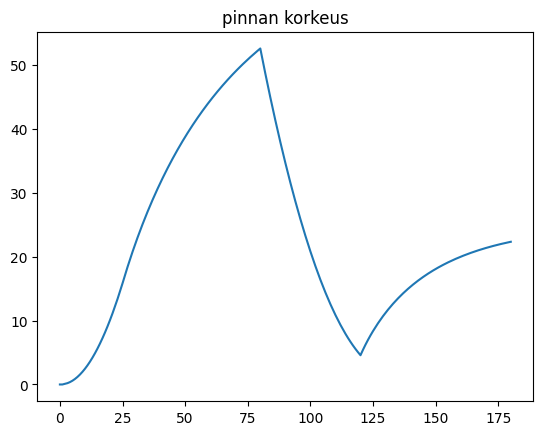

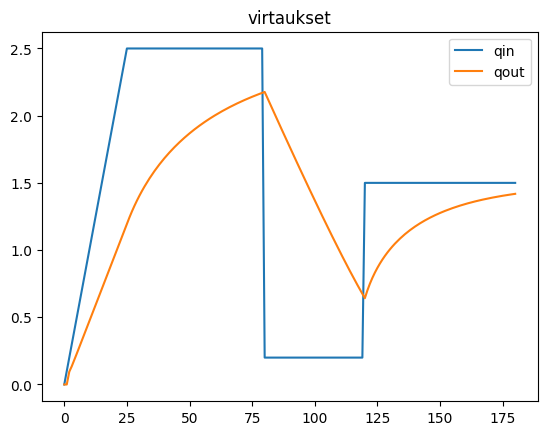


 simulaatio:  1  k:  0.4


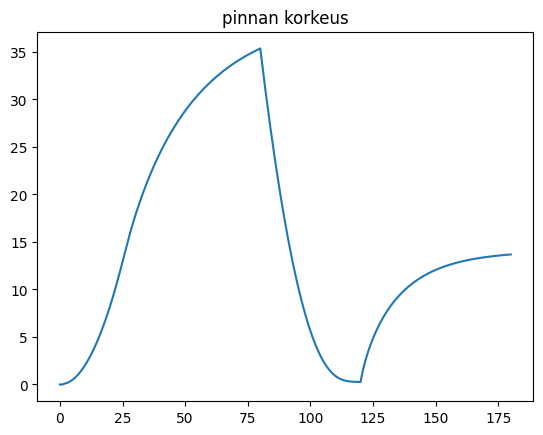

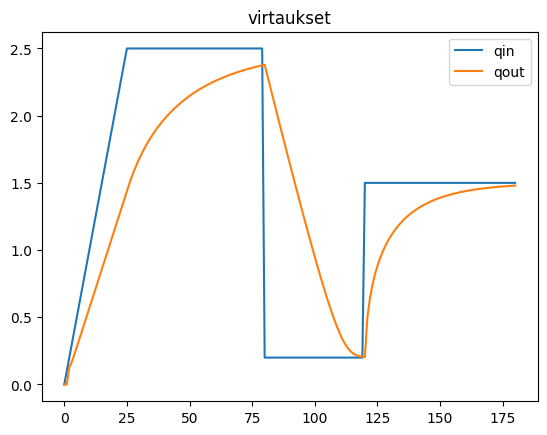


 simulaatio:  2  k:  0.5


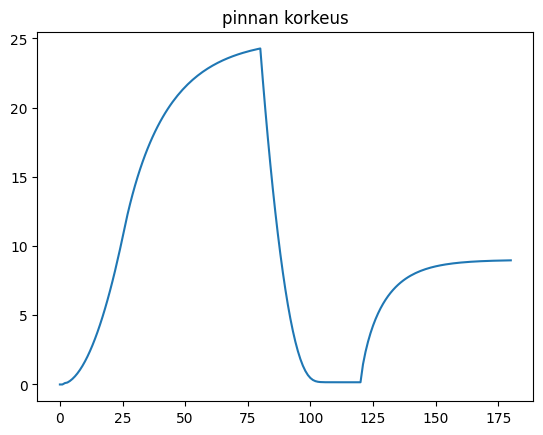

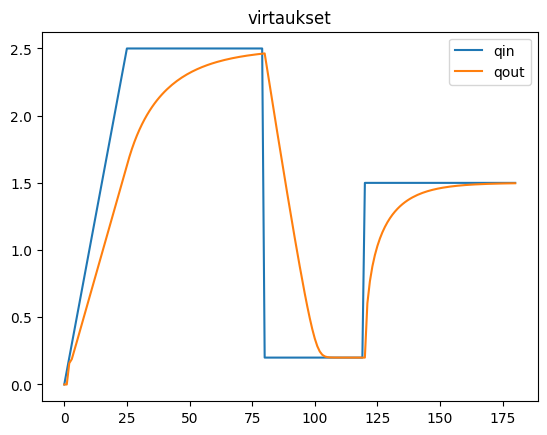


 simulaatio:  3  k:  0.6


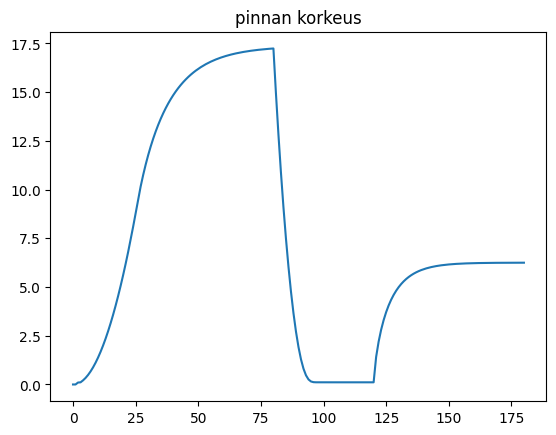

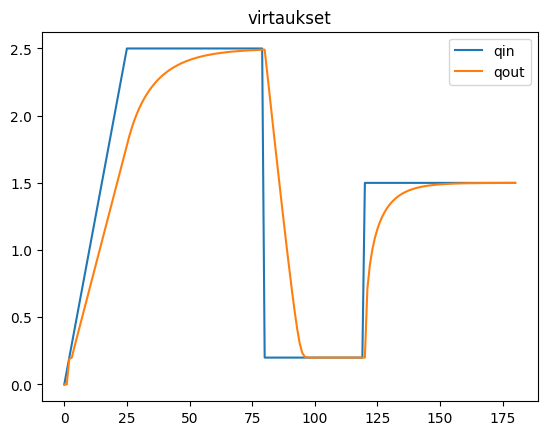

In [6]:
A = 0.1
k = 0.5
dt = 1.0
imax = 180

tt = [i*dt for i in range(0,imax+1)]
hh = [0.0 for i in range(0,imax+1)]
qout = [0.0 for i in range(0,imax+1)]
qin = [0.0 for i in range(0,imax+1)]

# aluksi avataan hitaasti venttiiliä
for i in range(0,25):
    qin[i+1] = qin[i] + 0.1

# Jätetään venttiili rauhaan    
for i in range(25,80):
    qin[i+1] = qin[i]

# Suljetaan nopeasti venttiiliä melkein kiinni    
for i in range(80,120):
    qin[i] = 0.2

# Avataan nopeasti venttiiliä        
for i in range(120,imax+1):
    qin[i] = 1.5

for j in range(0,4):
    k = 0.3 + j/10.0
    print('\n simulaatio: ',j,' k: ', k)
    # Lasketaan pinnankorkeus eri ajanhetkinä Eulerin algoritmilla
    for i in range(0,imax):
        if hh[i] < 0.0:   # virhe, jos h < 0
            print('!!! h: ', hh[i])
            qout[i] = 0.0
        else:
            qout[i] = k*sqrt(hh[i])
        hh[i+1] = hh[i] + (qin[i] - qout[i])*dt

    # Kuvaajasta tulee tyylikkäämpi kun laskemme ulosvirtauksen myös viimeiselle ajanhetkelle    
    qout[imax] = k*sqrt(hh[imax])

    plt.plot(tt, hh)
    plt.title("pinnan korkeus")
    plt.show()

    plt.plot(tt, qin, label='qin')
    plt.plot(tt, qout, label='qout')
    plt.legend(loc='upper right')
    plt.title("virtaukset")
    plt.show()

## Newtonin toinen laki

Fysiikan kirjoissa kerrotaan Newtonin laeista. Newtonin toisen lain $F = ma \Leftrightarrow a = F/m$ mukaan kappaleen kiihtyvyys a on sitä suurempi, mitä suurempi voima F siihen kohdistuu ja mitä pienempi on sen massa m.

(Tässä kohdin aloin miettiä, miksi liian kevyttä kiveä ei saa heitettyä niin pitkälle kuin sopivan painoista. Ehkä se johtuu siitä, että kiven lisäksi lihasten pitää saada kiihdytettyä käsikin vauhtiin. Tilannetta voisi tarkastella laskemalla, miten tietyn mittainen ja massainen vipuvarsi kiihtyy, kun sitä väännetään tietyllä momentilla. Samalla tulisi tutuksi pyörimisliikkeen ilmiöt. Ei kuitenkaan ryhdytä siihen nyt ettei homma karkaa kokonaan käsistä.)

Kiihtyvyys on nopeuden muutosnopeus eli nopeuden derivaatta ajan suhteen ja ja nopeus on paikan derivaatta ajan suhteen. Newtonin toinen laki on siis differentiaaliyhtälö 

$$F = m\frac{d²}{dt²}x(t) = m\frac{d}{dt}v(t)  \Leftrightarrow   \frac{d}{dt}v(t) = F/m$$

## Mörssäri

Sovelletaan Newtonin lakia vanhan ajan mörssärin kuulaan, jonka massa on $m$. Mörssärin putki on $\alpha$ asteen kulmassa maahan nähden ja kuulan lähtee sen putkesta nopeudella $v_0$. Unohdamme toistaiseksi ilmanvastuksen, jolloin kuulaan vaikuttaa y-suuntainen voima $-mg$ ja y-suuntainen kiihtyvyys on $a_y(t) = -mg/m$

Paikan ja nopeuden derivaatoista saamme neljän differentiaaliyhtälön ryhmän, jonka kirjoitamme matriisimuotoon:

$$\begin{bmatrix}
\frac{d}{dt}v_x(t) \\
\frac{d}{dt}v_y(t) \\
\frac{d}{dt}x(t)\\
\frac{d}{dt}y(t)\\
\end{bmatrix}
=
\begin{bmatrix}
0\\
-g\\
v_x(t)\\
v_y(t)\\
\end{bmatrix}
$$

Kuulan tullessa ulos piipusta $x = 0, y = 0, v_x = v_0*cos(\alpha), v_y = v_0*sin(\alpha)$

Ensimmäinen yhtälö kertoo, että vaakasuora nopeus ei muutu laukaisun jälkeen, koska mikään voima ei vaikuta kuulaan x-suunnassa. y-suuntainen kiihtyvyys on -g, koska kuulaan vaikuttaa voima $-mg$

## Numeerinen integrointi

Nyt olisi hauska nähdä, miten kuula lentää. 

$\frac{d}{dt}x(t) =  v(t)\\$ tarkoittaa, että $\frac{x(t+\Delta)-x(t)}{\Delta t} \text{ lähestyy } v(t)\text{:tä} $ kun $\Delta t$ lähestyy nollaa eli on äärettömän pieni. Matemaattisesti tämä esitetään seuraavasti:

$$\lim_{\Delta t \to 0} \frac{x(t+\Delta)-x(t)}{\Delta t} = v(t)$$

$\frac{x(t+\Delta)-x(t)}{\Delta t} = v(t) \Leftrightarrow x(t+\Delta t) = x(t) + v(t)\Delta t$ ei pidä tarkalleen paikkaansa, mutta ei ole ihan huonokaan arvio, jos $\Delta t$ on tarpeeksi lyhyt. Tähän arvioon perustuu differentiaaliyhtälöiden numeerinen ratkaiseminen yksinkertaisimmalla mahdollisella tavalla, Eulerin menetelmällä.

Unohdetaan mörssärin kuula hetkeksi ja otetaan testiesimerkiksi differentiaaliyhtälö $\frac{d}{dt}y(t) = y(t)$. Ylläolevan mukaisesti saamme sille approksimaation: $y(t + \Delta t) = y(t) + y(t) \Delta(t) $ 

Ratkaistaan ensin yhtälö analyyttisesti ja piirretään kuva helpottamaan approksimaation ymmärtämistä. 

In [7]:
t = sp.symbols('t')
y = sp.Function('y')(t)

g = sp.dsolve(sp.diff(y, t) - y)
display(g)

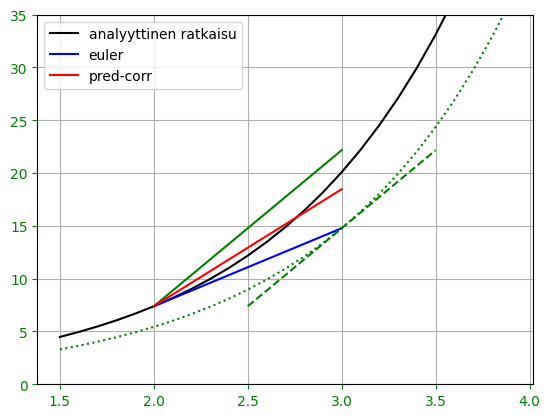

In [8]:
dt = 1.0  # aika-askel
ta = 2.0  # aikavälin alkupiste
tb = ta + dt  # aikavälin loppupiste

# aikapisteet, joissa piirretään funktion kuvaaja arvo
tt = [i * 0.1 for i in range(15, 40)]
# funktion arvot ym. aikapisteissä, piirtämistä varten, c_1 = 1
yy = [exp(t) for t in tt]
# funktion arvo aikavälin alkupisteessä
ya = exp(ta)  # y = dy/dt = exp(t) 
# funktion derivaatta aikavälin alkupisteessä
# Eulerin menetelmällä saatu funktion arvo aikavälin loppupisteessä
dya = ya  # y = dy/dt = exp(t)  
yb0 = ya + dya * dt
# derivaatan arvo ym. pisteessä
dyb = yb0
# approksimaatio funktion arvolle käyttäen ym. derivaattaa  
yb1 = ya + dyb * dt
C1 = yb0 / exp(tb)  # 
yy_e = [C1 * exp(t) for t in tt]
yb = ya + (dya + dyb) / 2.0
plt.plot(tt, yy, 'k-', label='analyyttinen ratkaisu')
plt.plot([ta, tb], [ya, yb0], 'b-', label='euler')
plt.plot([ta, tb], [ya, yb1], 'g-')
plt.plot([ta, tb], [ya, yb], 'r-', label='pred-corr')
plt.plot(tt, yy_e, 'g:')  # apukuvio
plt.plot([tb - 0.5 * dt, tb + 0.5 * dt],
         [yb0 - 0.5 * dt * dyb, yb0 + 0.5 * dt * dyb], 'g--')
plt.ylim([0, 35])
plt.grid(True)
plt.legend(loc='upper left')
plt.tick_params(axis='both', colors='green')
plt.show()

Eulerin menetelmällä edetään aikavälin alkupisteestä aika-askeleen verran funktion tangentin suuntaan. Lopputulos olisi tietysti oikea vain, jos funktion derivaatta olisi vakio.

Kuvankin perusteella tuntuisi hyvältä käyttää keskiarvoa funktion derivaattojen arvoista aikavälin päätepisteissä: $\frac{1}{2}(\frac{d}{dt}y(t+\Delta t) + \frac{d}{dt}y(t))$. Harmi kyllä funktion derivaatan arvo $\frac{d}{dt}y(t+\Delta t)$ riippuu funktion arvosta $y(t+\Delta t)$, mitä olemme juuri laskemassa. Eulerin menetelmällä saamme kuitenkin yleensä oikeansuuntaisen arvion y:lle ja sen derivaatalle hetkellä $t+ \Delta t$ joten voimme käyttää sitä approksimaationa derivaatan arvosta. Tätä integroimismenetelmää kutsutaan predictor-corrector menetelmäksi. Kuvaan on piiretty katkoviivalla Eulerin menetelmän mukainen arvio derivaatasta aikavälin päätepisteessä.

## Integrointirutiineja

Normaalisti käytetään matematiikkakirjastoissa olevia valmiita rutiineja, mutta koodasin tähän uteliaisuudesta ja harjoituksen vuoksi kolme niistä. Ne ovat seuraavan mallin mukaisia, missä `integ` on menetelmän nimi, joko `euler`, `pred_corr` tai `rk4`.

`y(t+dt) = integ(fdydt,yy,uu,dt)`

- `fdydt(yy,uu)`: käyttäjän kirjoittama funktio, joka palauttaa tilamuuttujien yy derivaatat.
- `yy`: järjestelmän tilamuuttujien `y(t)` lista (=taulukko, vektori, ...)
- `uu = u(t)`: ulkoiset ohjaukset ja parametrit
- `dt`: integrointiaskel
- funktio `integ` palauttaa listan `yy1`, joka on `y(t+dt)`

Kirjoittamillani rutiineilla voi siis ratkaista usean muuttujan differentiaaliyhtälöryhmiä.

In [9]:
# enumerate palauttaa vuorollaan kunkin listan yy alkioista y = yy[i] 
# ja sitä vastaavan indeksin i
def euler(fdydt, yy, uu, dt):
    dy = fdydt(yy, uu)
    yy1 = [y + dy[i] * dt for i, y in enumerate(yy)]
    return yy1

In [10]:
def pred_corr(fdydt, yy, uu, dt):
    dy_a = fdydt(yy, uu)
    yy_pred = [y + dy_a[i] * dt for i, y in enumerate(yy)]
    dy_b = fdydt(yy_pred, uu)
    yy_cor = [y + (dy_a[i] + dy_b[i]) * dt / 2.0 for i, y in enumerate(yy)]
    return yy_cor

Allaolevan Runge-Kutta 4 algoritmiin en ole koskaan kunnolla perehtynyt. Runge-Kutta algoritmeja on useita ja ymmärtääkseni ylläoleva predictor-corrector on yksinkertaisin Runge-Kutta algoritmi.  

In [11]:
# Runge-Kutta
# algoritmi: http://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods


def rk4(fdydt, yy, uu, dt):
    kk1 = fdydt(yy, uu)
    yk1 = [yy[i] + k1 * dt / 2.0 for i, k1 in enumerate(kk1)]
    kk2 = fdydt(yk1, uu)
    yk2 = [yy[i] + k2 * dt / 2.0 for i, k2 in enumerate(kk2)]
    kk3 = fdydt(yk2, uu)
    yk3 = [yy[i] + k3 * dt for i, k3 in enumerate(kk3)]
    kk4 = fdydt(yk3, uu)
    yy1 = [
        y + dt / 6.0 * (kk1[i] + 2.0 * kk2[i] + 2.0 * kk3[i] + kk4[i])
        for i, y in enumerate(yy)
    ]
    return yy1

## Mörssärin kuulan lento

Testataan integrointirutiineja mörssärin kuulan lentoon. Halusin nähdä, miten ilmanvastus vaikuttaa kuulan lentoon, joten lisäsin yhtälöihin ilmanvastuksen. 

Ilmanvastus on yleensä verrannollinen nopeuden neliöön: $F_{\varrho} = c_{\varrho} v^2$. Koska ilmanvastuksen aiheuttama voima vastustaa kappaleen liikettä sen suunta on nopeudelle vastakkainen.

Pallonmuotoiselle kappaleelle löytynee wikipediasta järkevä arvo $c_{\varrho}$:lle, mutta hain sille kokeilemalla arvon, joka vaikutti pikkuisen lentorataan.

Kirjoitin funktion, joka palauttaa ilmanvastuksen aiheuttaman kiihtyvyyden (=jarrutuksen) x- ja y-komponentit. Jätän trigonometrian harjoitukseksi miettiä, miten koodi toimii.

Aluksi asetin kaikki derivaatat nolliksi kuulan osuttua maahan eli kun `y  < 0`, mutta pian innostuin kokeilemaan, miltä näyttäisi, jos kuula ei heti pysähtyisi, vaan vastus kasvaisi kuulan porautuessa syvemmälle maahan. 
```python
if (y < 0):
        Fv = Fv*(1 - 10*y)
```
Vastus kasvaa kymmenkertaiseksi kuulan porauduttua metrin syvyyteen. Melko lailla epärealistinen malli kuulan tunkeutumiselle maahan. Vastuksen pitäisi olla ehkä ainakin tuhatkertainen. Numeerisen integroinnin kannalta suuret äkkinäiset muutokset järjestelmän parametreissa ovat kuitenkin hankalia. Ilmalennon voi laskea paljon pidemmällä integrointiaskeleella kuin maahan törmäämisen ja siihen porautumisen. Integrointiaskeleen sopivan pituuden pohdiskelun jätän kuitenkin tekemättä. 

In [12]:
def ilmanvastus(xx, roo):
    [vx, vy, x, y] = xx
    v2 = vx**2 + vy**2
    v = sqrt(v2)
    Fv = -roo * v2
    if (y < 0):
        Fv = Fv * (1.0 - 4.0 * y)
    a = Fv / m
    v = sqrt(v2)
    ax = a * vx / v
    ay = a * vy / v
    return ax, ay

Mörssärin kuula tuskin pomppaa tennispallon lailla uudestaan ilmaan maahan osuttuaan, mutta halusin kuitenkin kokeilla, miten pomppisen voisi mallintaa niin, että se näyttäisi "luonnolliselta". Lisäsin jousivoiman tapaisen voiman, joka työntää kuula ylöspäin sitä voimakkaammin, mitä syvemmällä maassa se on. Mallinnin siis maaperän jonkinlaiseksi kumimatoksi. Kuula olisi alun perin kannattanut ajatella kokoonpainuvaksi osittain kimmoisaksi palloksi niin pomppiminen olisi ollut luontevampi mallintaa.

Täysin kimmoisan törmäyksen voisi mallintaa niin, että kun korkeus on pienempi kuin nolla ja pystysuora nopeus alaspäin, käännetään pystysuora nopeus osoittamaan ylöspäin.

```python
if (y < 0 and vy < 0):
    vy = -vy
```

Halusin kuitenkin törmäyksen täysin kimmoisen ja täysin kimmottoman törmäyksen väliltä. Nyt vastus vie osan liike-energiasta eikä törmäys siksi ole täysin kimmoinen. Kuula kuitenkin kimpoaa maasta, joten törmäys ei ole täysin kimmotonkaan.

In [13]:
def pomppu(xx):
    [vx, vy, x, y] = xx
    if (y < 0):
        ay = -2.5 * g * y
    else:
        ay = 0
    return ay

Tuulesta temmaten arvioin, että kuulaa ylöspäin heittävä voima on viisinkertainen kuulan painoon verrattuna, kun kuula on metrin syvyydessä. Mallinin voima suoraan verrannolliseksi siirtymään, kuten tavallisella jousellakin.

integrointirutiinien vaatima järjestelmän tilamuuttujien aikaderivaatat palauttava funktio

In [14]:
def fdxdt(xx, uu):
    [vx, vy, x, y] = xx
    [roo] = uu
    ax_iv, ay_iv = ilmanvastus(xx, roo)
    ay_pmp = pomppu(xx)
    dvx = ax_iv
    dvy = (ay_iv + ay_pmp - g)
    dx = vx
    dy = vy
    return [dvx, dvy, dx, dy]

aikapisteiden lukumäärä:  1200


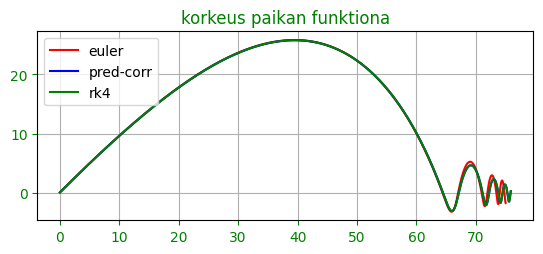

In [15]:
g = 9.81  # maan vetovoiman kiihtyvyys
m = 1.0  # kuulan massa
# Mörssärin putken kulma maahan nähden, 45 astetta, joka muunnetaan radiaaneiksi
alpha = 45.0 * (2.0 * pi / 360.0)
# lennon lähtöpisteen x-koordinaatti
x0 = 0.0
# lennon lähtöpisteen y-koordinaatti. 
#Pieni positiivinen, koska y0 = 0 on maahan törmäämisen ehto
y0 = 0.1
v0 = 50  #  lähtönopeus
vx0 = cos(alpha) * v0
vy0 = sin(alpha) * v0
T0 = 12.0  # Simuloinnnin loppuaika
dt = 0.01  # integrointiaskel
dim = int(T0 / dt)  # aikapisteiden lukumäärä
print("aikapisteiden lukumäärä: ", dim)
tt = [i * dt for i in range(0, dim)]  # aikapisteet
# Alustetaan taulukko, jossa on tilavektori kullakin ajanhetkellä.
# Riittää ilmoittaa, että siinä on dim-alkiota
xxa = [0 for i in range(0, dim)]
xxa[0] = [vx0, vy0, x0, y0]  # tilamuuttujien arvot alkuhetkellä t = 0
xxb = [0 for i in range(0, dim)]
xxb[0] = [vx0, vy0, x0, y0]
xxc = [0 for i in range(0, dim)]
xxc[0] = [vx0, vy0, x0, y0]

roo = 0.02  # ilmavastuksen kerroin
#  simuloidaan kolmella eri integrointirutiinilla
for i in range(0, dim - 1):
    xxa[i + 1] = euler(fdxdt, xxa[i], [roo], dt)
    xxb[i + 1] = pred_corr(fdxdt, xxb[i], [roo], dt)
    xxc[i + 1] = rk4(fdxdt, xxc[i], [roo], dt)

# Piirtämistä varten listoista pitää tehdä numpy-taulukoita
zza = np.array(xxa)
zzb = np.array(xxb)
zzc = np.array(xxc)

fig, ax = plt.subplots()
ax.set_aspect('equal')  # Näin käyrät piirtyvän oikean muotoisina
ax.plot(zza[:, 2], zza[:, 3], 'r-', label='euler')
ax.plot(zzb[:, 2], zzb[:, 3], 'b-', label='pred-corr')
ax.plot(zzc[:, 2], zzc[:, 3], 'g-', label='rk4')
ax.grid(True)
ax.set_title("korkeus paikan funktiona", color='green')
ax.tick_params(axis='both', colors='green')
ax.legend(loc='upper left')
plt.show()

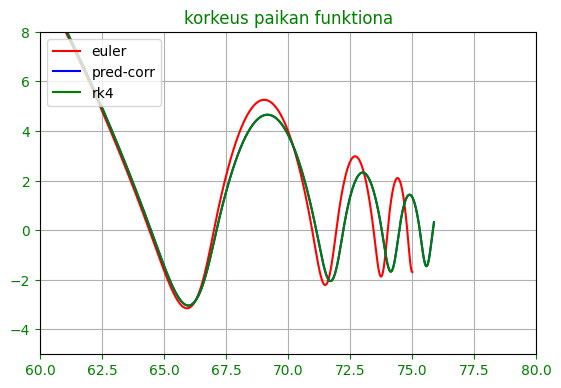

In [16]:
#  "osasuurennos" edellisestä
fig, ax = plt.subplots()
ax.set_aspect('equal')  # Näin käyrät piirtyvän oikean muotoisina
ax.plot(zza[:, 2], zza[:, 3], 'r-', label='euler')
ax.plot(zzb[:, 2], zzb[:, 3], 'b-', label='pred-corr')
ax.plot(zzc[:, 2], zzc[:, 3], 'g-', label='rk4')
plt.xlim([60, 80])
plt.ylim([-5, 8])
ax.grid(True)
ax.set_title("korkeus paikan funktiona", color='green')
ax.tick_params(axis='both', colors='green')
ax.legend(loc='upper left')
plt.show()


Lentoradan huippukohta on 40 metrin kohdalla. Ellei ilmanvastusta olisi otettu huomioon, kuula lentäisi yli 80 metriä ja lentorata olisi symmetrinen &#8212; parabeli

Aikapisteitä on 1200, mikä on paljon, mutta silti eulerin menetelmä "eksyy" pahasti kahdesta tarkemmasta. Tässä tehtävässä eksyminen johtuu maahan osumisen aiheuttamista suurista kiihtyvyyksistä ilmalentoon verrattuna. Tämä näkyy parhaiten vaaka- ja pystynopeuden nopeista muutoksista.

On olemassa algoritmeja, jotka arvioivat integroinnin virhettä ja sovittavat integrointiaskeleen sen mukaan. 

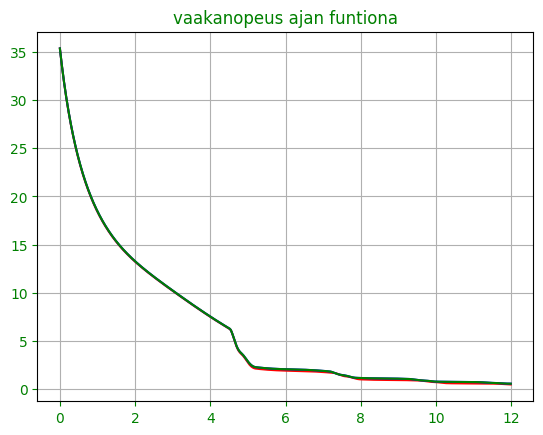

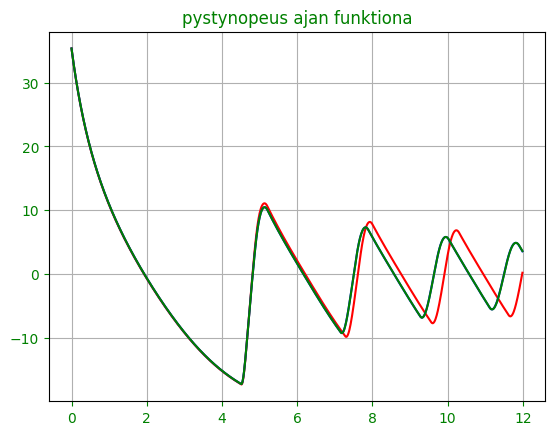

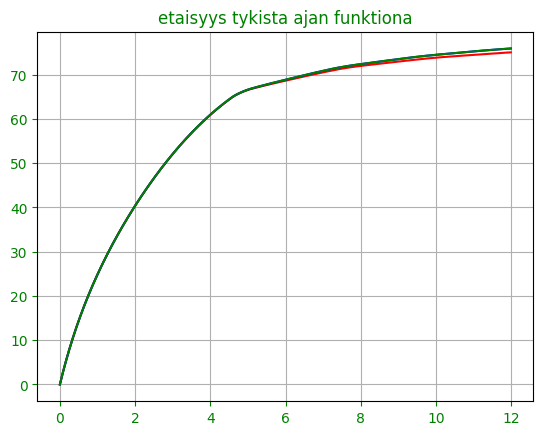

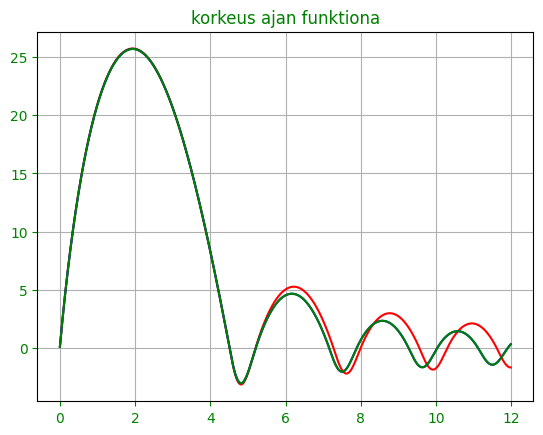

In [17]:
otsikot = [
    "vaakanopeus ajan funtiona", "pystynopeus ajan funktiona",
    "etaisyys tykista ajan funktiona", "korkeus ajan funktiona"
]

for j in range(0, 4):
    plt.plot(tt, zza[:, j], 'r-')
    plt.plot(tt, zzb[:, j], 'b-')
    plt.plot(tt, zzc[:, j], 'g-')
    plt.grid(True)
    plt.title(otsikot[j], color='green')
    plt.tick_params(axis='both', colors='green')
    plt.show()

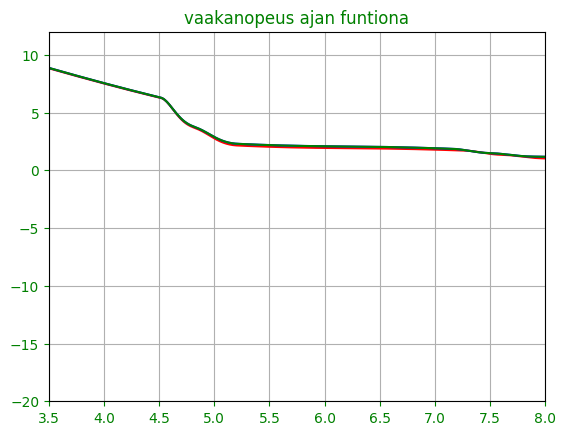

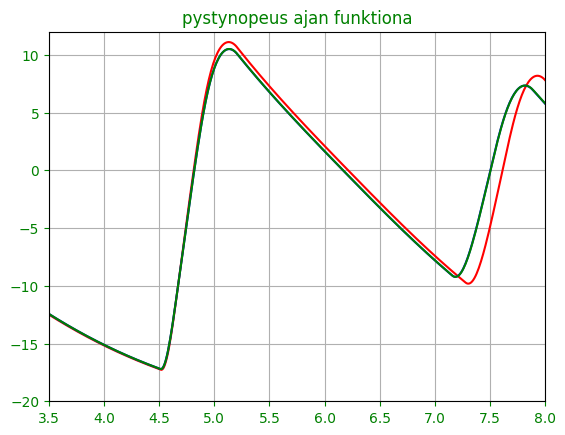

In [18]:
for j in range(0, 2):
    plt.plot(tt, zza[:, j], 'r-')
    plt.plot(tt, zzb[:, j], 'b-')
    plt.plot(tt, zzc[:, j], 'g-')
    plt.xlim([3.5, 8.0])
    plt.ylim([-20, 12])
    plt.grid(True)
    plt.title(otsikot[j], color='green')
    plt.tick_params(axis='both', colors='green')
    plt.show()

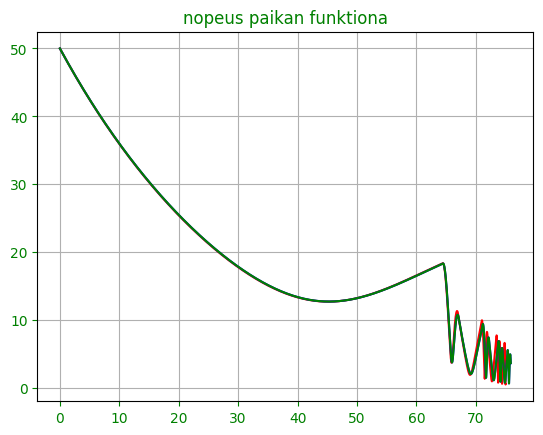

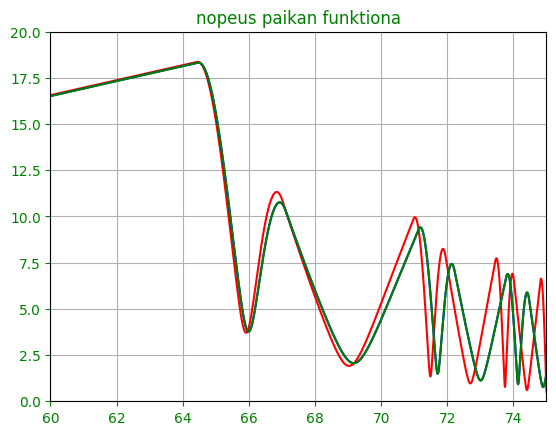

In [19]:
vv = [sqrt(zza[t, 0]**2 + zza[t, 1]**2) for t in range(0, dim)]
plt.plot(zza[:, 2], vv, 'r-')
vv = [sqrt(zzb[t, 0]**2 + zzb[t, 1]**2) for t in range(0, dim)]
plt.plot(zzb[:, 2], vv, 'b-')
vv = [sqrt(zzc[t, 0]**2 + zzc[t, 1]**2) for t in range(0, dim)]
plt.plot(zzc[:, 2], vv, 'g-')
plt.grid(True)
plt.title("nopeus paikan funktiona", color='green')
plt.tick_params(axis='both', colors='green')
# plt.legend(loc='upper left')
plt.show()

vv = [sqrt(zza[t, 0]**2 + zza[t, 1]**2) for t in range(0, dim)]
plt.plot(zza[:, 2], vv, 'r-')
vv = [sqrt(zzb[t, 0]**2 + zzb[t, 1]**2) for t in range(0, dim)]
plt.plot(zzb[:, 2], vv, 'b-')
vv = [sqrt(zzc[t, 0]**2 + zzc[t, 1]**2) for t in range(0, dim)]
plt.plot(zzc[:, 2], vv, 'g-')
plt.xlim([60, 75])
plt.ylim([0, 20])
plt.grid(True)
plt.title("nopeus paikan funktiona", color='green')
plt.tick_params(axis='both', colors='green')
#plt.legend(loc='upper left')
plt.show()

Lasketaan lentoradat kolmella eri lähtökulmalla

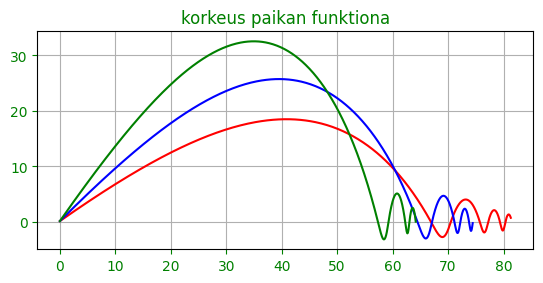

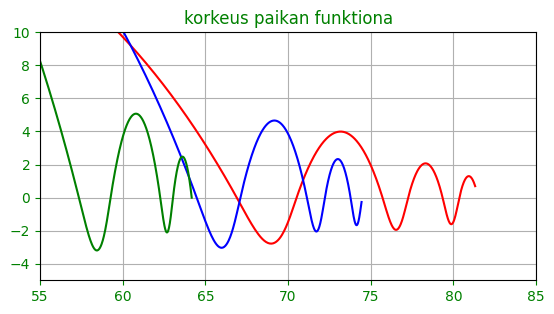

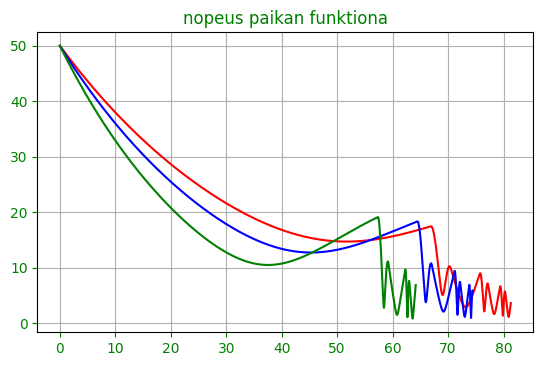

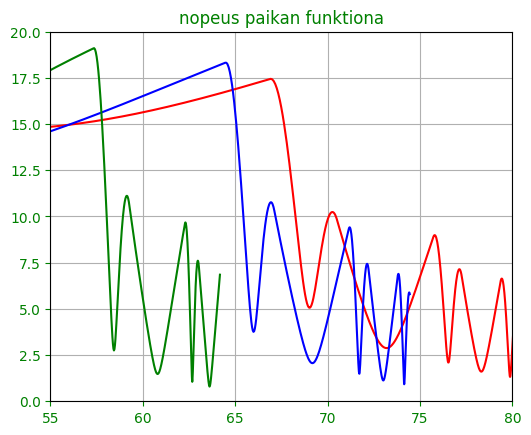

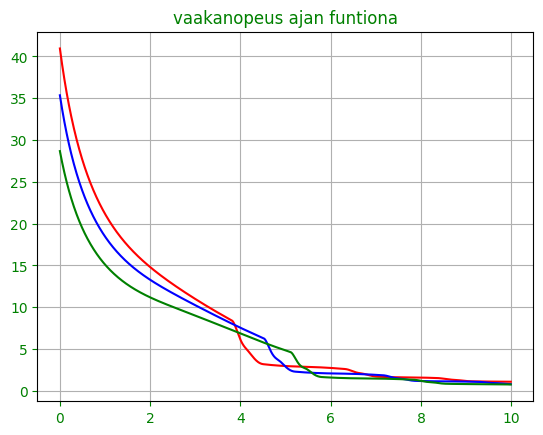

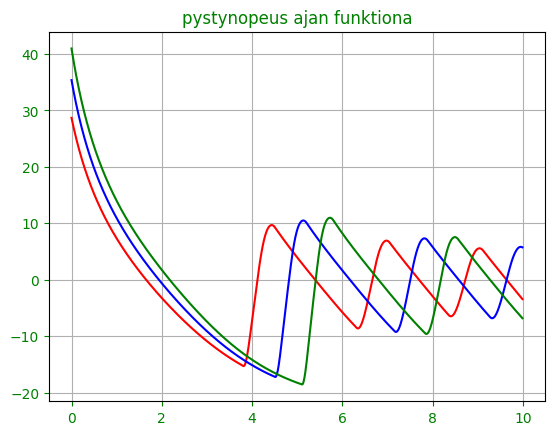

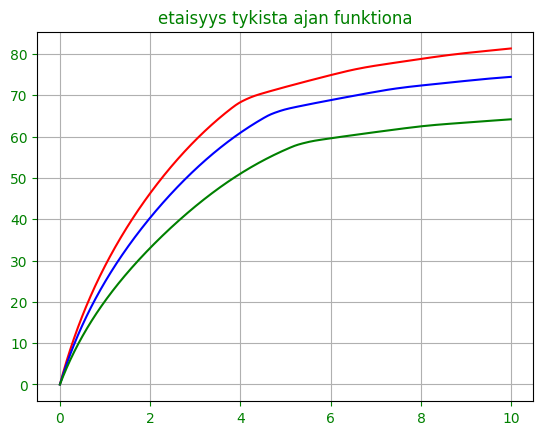

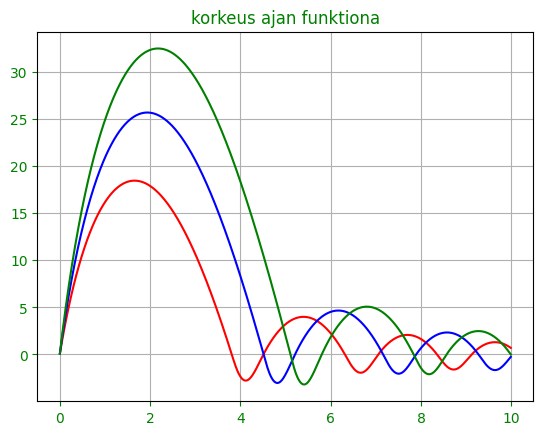

In [20]:
def lento(roo, korotus, v0):
    alpha = korotus * (2.0 * pi / 360.0)
    vx0 = cos(alpha) * v0
    vy0 = sin(alpha) * v0
    xx = [0 for i in range(0, dim)]
    xx[0] = [vx0, vy0, x0, y0]
    for i in range(0, dim - 1):
        xx[i + 1] = rk4(fdxdt, xx[i], [roo], dt)
    return np.array(xx)


g = 9.81
m = 1.0
x0 = 0.0
y0 = 0.1
T0 = 10.0
dt = 0.01
dim = int(T0 / dt)
tt = [i * dt for i in range(0, dim)]

zza = lento(0.02, 35, 50)
zzb = lento(0.02, 45, 50)
zzc = lento(0.02, 55, 50)

fig, ax = plt.subplots()
ax.set_aspect('equal')  # Näin käyrät piirtyvän oikean muotoisina
ax.plot(zza[:, 2], zza[:, 3], 'r-')
ax.plot(zzb[:, 2], zzb[:, 3], 'b-')
ax.plot(zzc[:, 2], zzc[:, 3], 'g-')
ax.grid(True)
ax.set_title("korkeus paikan funktiona", color='green')
ax.tick_params(axis='both', colors='green')
plt.show()

fig, ax = plt.subplots()
ax.set_aspect('equal')  # Näin käyrät piirtyvän oikean muotoisina
ax.plot(zza[:, 2], zza[:, 3], 'r-')
ax.plot(zzb[:, 2], zzb[:, 3], 'b-')
ax.plot(zzc[:, 2], zzc[:, 3], 'g-')
plt.xlim((55, 85))
plt.ylim((-5, 10))
ax.grid(True)
ax.set_title("korkeus paikan funktiona", color='green')
ax.tick_params(axis='both', colors='green')
plt.show()

fig, ax = plt.subplots()
ax.set_aspect('equal')  # Näin käyrät piirtyvän oikean muotoisina
vv = [sqrt(zza[t, 0]**2 + zza[t, 1]**2) for t in range(0, dim)]
ax.plot(zza[:, 2], vv, 'r-')
vv = [sqrt(zzb[t, 0]**2 + zzb[t, 1]**2) for t in range(0, dim)]
ax.plot(zzb[:, 2], vv, 'b-')
vv = [sqrt(zzc[t, 0]**2 + zzc[t, 1]**2) for t in range(0, dim)]
ax.plot(zzc[:, 2], vv, 'g-')
ax.grid(True)
ax.set_title("nopeus paikan funktiona", color='green')
ax.tick_params(axis='both', colors='green')
plt.show()

fig, ax = plt.subplots()
ax.set_aspect('equal')  # Näin käyrät piirtyvän oikean muotoisina
vv = [sqrt(zza[t, 0]**2 + zza[t, 1]**2) for t in range(0, dim)]
ax.plot(zza[:, 2], vv, 'r-')
vv = [sqrt(zzb[t, 0]**2 + zzb[t, 1]**2) for t in range(0, dim)]
ax.plot(zzb[:, 2], vv, 'b-')
vv = [sqrt(zzc[t, 0]**2 + zzc[t, 1]**2) for t in range(0, dim)]
ax.plot(zzc[:, 2], vv, 'g-')
plt.xlim((55, 80))
plt.ylim((0, 20))
ax.grid(True)
ax.set_title("nopeus paikan funktiona", color='green')
ax.tick_params(axis='both', colors='green')
plt.show()

otsikot = [
    "vaakanopeus ajan funtiona", "pystynopeus ajan funktiona",
    "etaisyys tykista ajan funktiona", "korkeus ajan funktiona"
]

for j in range(0, 4):
    fig, ax = plt.subplots()
    # ax.set_aspect('equal')  # Näin käyrät piirtyvän oikean muotoisina
    ax.plot(tt, zza[:, j], 'r-')
    ax.plot(tt, zzb[:, j], 'b-')
    ax.plot(tt, zzc[:, j], 'g-')
    ax.grid(True)
    ax.set_title(otsikot[j], color='green')
    ax.tick_params(axis='both', colors='green')
    plt.show()

[Muuta ohjelmoinnista](https://www.heikki-valisuo.fi/html/OhjOpp.html)